<a href="https://colab.research.google.com/github/DOLLARDEV05/AI-LAB/blob/main/Attention_is_All_You_Need/Transformers/single_head_attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [184]:
import numpy as np

sentence = "My cat is lazy"

tokens = sentence.lower().split()
print("Tokens:", tokens)

vocab = {word: idx for idx, word in enumerate(set(tokens))}
print("Vocab:", vocab)

token_ids = np.array([vocab[word] for word in tokens])
print("Token IDs:", token_ids)


Tokens: ['my', 'cat', 'is', 'lazy']
Vocab: {'my': 0, 'cat': 1, 'lazy': 2, 'is': 3}
Token IDs: [0 1 3 2]


In [185]:
# let's create some embeddings!

d_model = 4

# this will create a random matrix of small float values with dimension being
# rows = length of the sentence/token list, columns being the dimension we set
# that is the d_model = 4 where this is a hyperparameter, and for single head
# attention this is d_model = Q = K = V
embedding = np.random.rand(len(tokens),d_model)

print(embedding)

[[0.98063813 0.09958648 0.57845743 0.31143563]
 [0.34093646 0.22027438 0.81974958 0.57372082]
 [0.64445804 0.63078155 0.40901934 0.72895244]
 [0.79276287 0.24375449 0.72642809 0.45066872]]


In [186]:
embedding_token = np.array([embedding[vocab[token]] for token in tokens])
print(embedding_token)

[[0.98063813 0.09958648 0.57845743 0.31143563]
 [0.34093646 0.22027438 0.81974958 0.57372082]
 [0.79276287 0.24375449 0.72642809 0.45066872]
 [0.64445804 0.63078155 0.40901934 0.72895244]]


In [187]:
# let's convert the maths of positional encoding into code successful

import math

for embedding in range(len(embedding_token)):
  for value in range(d_model):
    if value % 2 == 0:
      temp = math.sin(embedding/10000**((2*(value//2))/d_model))
      embedding_token[embedding,value]=embedding_token[embedding,value]+temp
    elif value % 2 == 1:
      temp = math.cos(embedding/10000**((2*(value//2))/d_model))
      embedding_token[embedding,value]=embedding_token[embedding,value]+temp
    else:
      print("error")
print(embedding_token)

[[ 0.98063813  1.09958648  0.57845743  1.31143563]
 [ 1.18240744  0.76057669  0.82974941  1.57367082]
 [ 1.70206029 -0.17239235  0.74642676  1.45046873]
 [ 0.78557805 -0.35921095  0.43901484  1.72850248]]


In [188]:
x = 0 // 2
y = 1 // 2
z = 2 // 2
p = 3 // 2
q = 4 // 2

# how positional encoding uses floor division to have similar values given to the
# sin and cos fuction to have pi/2 shifted sin and cos waves that also dipicts a
# circle idk if this is necessary to mention here

print(x,y,z,p,q)

# was just showcasing where i was stuck in positional encoding and why it matter

0 0 1 1 2


In [189]:
# let's work on making the weight matrix that will extract features from the
# embedding matrix ! W_Q,W_K,W_V


W_Q = np.random.rand(d_model,d_model)
W_K = np.random.rand(d_model,d_model)
W_V = np.random.rand(d_model,d_model)

print(W_Q)
print(W_K)
print(W_V)

[[0.85231453 0.94431803 0.30053865 0.34504288]
 [0.68964868 0.67961939 0.60620592 0.13620461]
 [0.52496047 0.76510726 0.64042976 0.7756089 ]
 [0.71159255 0.17034381 0.65759754 0.25798457]]
[[0.04093992 0.9197648  0.85635628 0.68112822]
 [0.83963663 0.69882936 0.06385275 0.77309459]
 [0.02190291 0.57101023 0.99797355 0.11747469]
 [0.78211118 0.78940167 0.79993567 0.81702086]]
[[0.1075652  0.52060901 0.88999735 0.03807851]
 [0.99865133 0.07178732 0.45351022 0.22891828]
 [0.3664555  0.30055749 0.02384282 0.32389847]
 [0.35052758 0.43751403 0.5931113  0.56920116]]


In [190]:
# multiplying the weighted matrix with the embedded_token to get Q K V matrices


Q = embedding_token @ W_Q
K = embedding_token @ W_K
V = embedding_token @ W_V

print(Q,"\n\n",K,"\n\n\n",V,"\n\n\n\n")

# i used the ** 1/2 or **0.5 which is fine for scalers and one time operations
# but its better to use np.sqrt() which is faster for sqrting whole arrays!
# print((Q @ K.T)/d_model**(1/2))
pre_softmax = (Q @ K.T)/np.sqrt(d_model)

print(pre_softmax)

[[2.8310156  2.33931147 2.19415369 1.27511784]
 [3.08771183 2.53638371 2.38266351 1.56111915]
 [2.75578785 2.30829994 1.83888822 1.51693695]
 [1.88228515 1.12804192 1.43615791 1.00856271]] 

 [[2.0017587  3.03593434 2.5363366  2.65744904]
 [1.93597517 3.33510385 3.14803035 2.77656524]
 [1.075712   3.01624207 3.35175814 2.29879517]
 [1.09205164 2.08668459 2.47061407 1.72117106]] 


 [[1.8752593  1.33709661 2.1630584  1.22288884]
 [1.74241807 1.6080622  2.35041431 1.38362404]
 [0.79288408 1.73267692 2.31473377 1.09272312]
 [0.49254155 1.27138551 1.57191825 1.07374553]] 




[[10.86133957 11.86516647 10.19339719  7.79431168]
 [12.03648982 13.13604136 11.27332043  8.61908432]
 [10.60974574 11.5171536   9.78873066  7.49012382]
 [ 6.75766288  7.36380157  6.27968864  4.84676059]]


In [191]:
# let's recreate softmax from scratch using only numpy and convert these vectors
# into attention scores that our model can use!

# done with row max subtraction for each element (was checking row max each
# iterations which caused all values other than 1st getting zeroed)

# we dont sum all row values and then exponent rather we sum the exponent of
# individual values then divide


for vector in pre_softmax:
  row_max = np.max(vector,axis=0)
  for element in range(len(vector)):
    vector[element] = np.exp(vector[element] - row_max)
  vector /= np.sum(vector)


softmax = pre_softmax.copy()
print(softmax)


[[0.23320753 0.63635439 0.11958009 0.01085799]
 [0.22213322 0.66702586 0.10355552 0.0072854 ]
 [0.2523946  0.62540636 0.11104979 0.01114925]
 [0.27767568 0.50907356 0.17216952 0.04108124]]


In [192]:
# final attention mechanism done
attention = softmax @ V

print(attention)

[[1.64628114 1.55611679 2.29400192 1.30798877]
 [1.66449118 1.55832346 2.29942977 1.31553743]
 [1.65656574 1.5497567  2.29048473 1.30729595]
 [1.56447756 1.54044541 2.26026545 1.27617732]]


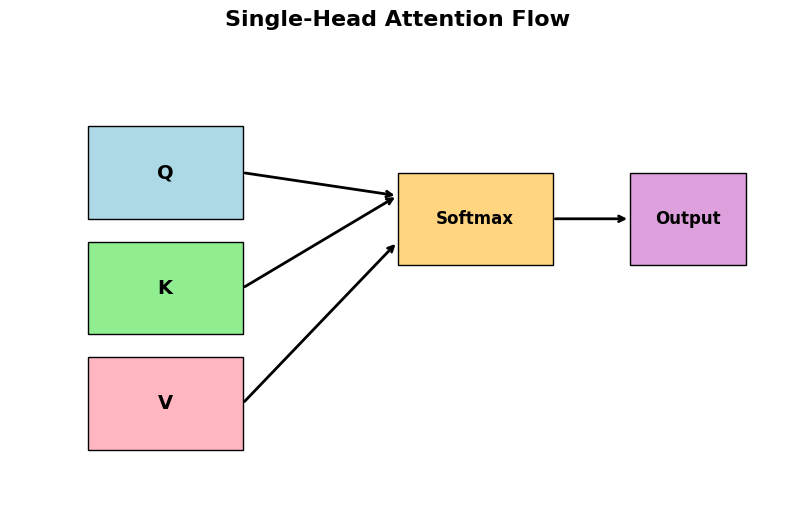

In [193]:
# flow diagram gpt code generated

import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10,6))

# Draw boxes
ax.add_patch(patches.Rectangle((0.1, 0.6), 0.2, 0.2, fill=True, edgecolor="black", facecolor="#ADD8E6"))
ax.text(0.2, 0.7, "Q", ha="center", va="center", fontsize=14, weight="bold")

ax.add_patch(patches.Rectangle((0.1, 0.35), 0.2, 0.2, fill=True, edgecolor="black", facecolor="#90EE90"))
ax.text(0.2, 0.45, "K", ha="center", va="center", fontsize=14, weight="bold")

ax.add_patch(patches.Rectangle((0.1, 0.1), 0.2, 0.2, fill=True, edgecolor="black", facecolor="#FFB6C1"))
ax.text(0.2, 0.2, "V", ha="center", va="center", fontsize=14, weight="bold")

# Softmax box
ax.add_patch(patches.Rectangle((0.5, 0.5), 0.2, 0.2, fill=True, edgecolor="black", facecolor="#FFD580"))
ax.text(0.6, 0.6, "Softmax", ha="center", va="center", fontsize=12, weight="bold")

# Output box
ax.add_patch(patches.Rectangle((0.8, 0.5), 0.15, 0.2, fill=True, edgecolor="black", facecolor="#DDA0DD"))
ax.text(0.875, 0.6, "Output", ha="center", va="center", fontsize=12, weight="bold")

# Arrows
ax.annotate("", xy=(0.5, 0.65), xytext=(0.3, 0.7), arrowprops=dict(arrowstyle="->", lw=2))
ax.annotate("", xy=(0.5, 0.65), xytext=(0.3, 0.45), arrowprops=dict(arrowstyle="->", lw=2))
ax.annotate("", xy=(0.5, 0.55), xytext=(0.3, 0.2), arrowprops=dict(arrowstyle="->", lw=2))
ax.annotate("", xy=(0.8, 0.6), xytext=(0.7, 0.6), arrowprops=dict(arrowstyle="->", lw=2))

ax.axis("off")
plt.title("Single-Head Attention Flow", fontsize=16, weight="bold")
plt.show()


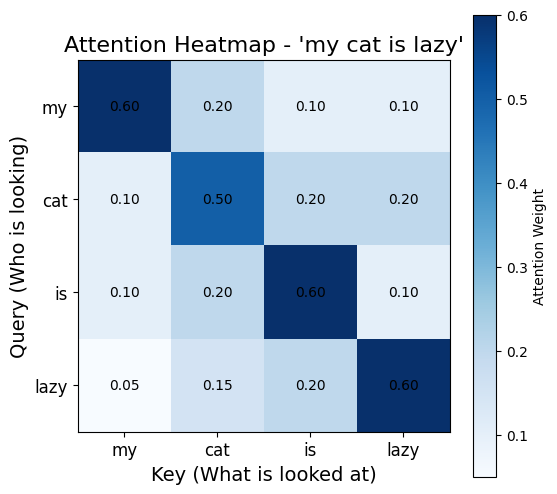

In [196]:
import numpy as np
import matplotlib.pyplot as plt

# Example sentence
tokens = ["my", "cat", "is", "lazy"]

# Example attention weights (softmax output, 4x4 matrix)
# Each row = how much that word (query) attends to the others (keys)
attention = np.array([
    [0.6, 0.2, 0.1, 0.1],  # "my"
    [0.1, 0.5, 0.2, 0.2],  # "cat"
    [0.1, 0.2, 0.6, 0.1],  # "is"
    [0.05, 0.15, 0.2, 0.6] # "lazy"
])

plt.figure(figsize=(6,6))
plt.imshow(attention, cmap="Blues")

# Add token labels
plt.xticks(range(len(tokens)), tokens, fontsize=12)
plt.yticks(range(len(tokens)), tokens, fontsize=12)

# Add values inside the heatmap
for i in range(len(tokens)):
    for j in range(len(tokens)):
        plt.text(j, i, f"{attention[i, j]:.2f}",
                 ha="center", va="center", color="black")

plt.xlabel("Key (What is looked at)", fontsize=14)
plt.ylabel("Query (Who is looking)", fontsize=14)
plt.title("Attention Heatmap - 'my cat is lazy'", fontsize=16)
plt.colorbar(label="Attention Weight")
plt.show()


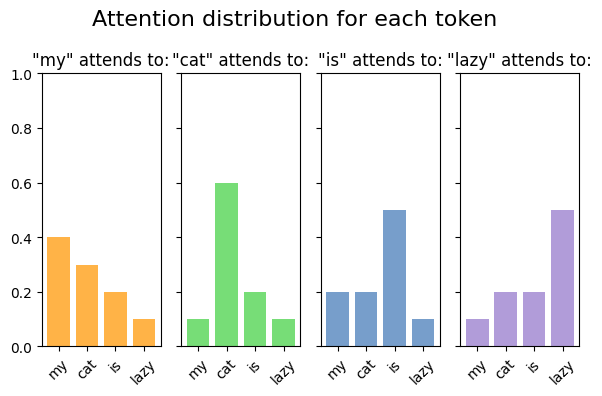

In [198]:
import matplotlib.pyplot as plt
import numpy as np

# Example sentence
tokens = ["my", "cat", "is", "lazy"]

# Fake attention scores (rows = query word, cols = attended word)
# Normally you'd use your softmax output here
attention_scores = np.array([
    [0.4, 0.3, 0.2, 0.1],  # "my"
    [0.1, 0.6, 0.2, 0.1],  # "cat"
    [0.2, 0.2, 0.5, 0.1],  # "is"
    [0.1, 0.2, 0.2, 0.5],  # "lazy"
])

colors = ["#FFB347", "#77DD77", "#779ECB", "#B19CD9"]  # orange, green, blue, purple

fig, axes = plt.subplots(1, len(tokens), figsize=(6, 4), sharey=True)

for i, ax in enumerate(axes):
    ax.bar(tokens, attention_scores[i], color=colors[i])
    ax.set_title(f'"{tokens[i]}" attends to:')
    ax.set_ylim(0, 1)
    ax.tick_params(axis='x', rotation=45)

fig.suptitle("Attention distribution for each token", fontsize=16)
plt.tight_layout()
plt.show()
